In [32]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [16]:
df = pd.read_csv("clustering.csv", header=None)
df = np.array(df)

## Metoda KMeans

In [18]:
# funkcja z labów
def plot_kmeans_clusters(X, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(X)
    y_kmeans = kmeans.predict(X)
    plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=30, cmap='viridis')

    centers = kmeans.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.75)
    plt.title('K-means clusters')
    plt.show()

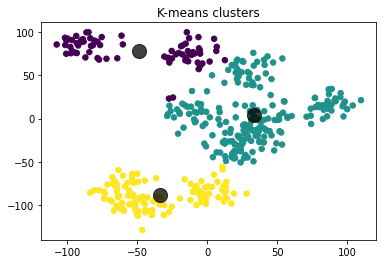

In [23]:
plot_kmeans_clusters(df, n_clusters=3)

Na oko klastrów powinno być więcej. Spróbujemy metody łokcia oraz metryki silhouette.

### Metoda Łokcia

Zacznijmy od tego, że algorytm k-średnich minimalizuję wewnątrzklastrową sumę kwadratów (ang. within-cluster sum of squares):
$$\underset{\mathbf{S}}{\operatorname{argmin}}\sum_{i=1}^{k}\sum_{\mathbf{x} \in S_i} {\lVert \mathbf{x} - \mu_i \rVert^2} = \underset{\mathbf{S}}{\operatorname{argmin}}\sum_{i=1}^{k} |S_i| \mathrm{Var} (S_i) $$

In [20]:
# funkcja z labów
def count_wcss_scores(X, k_max):
    #  WCSS = within-cluster sum of squares
    scores = []
    for k in range(1, k_max+1):
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(X)
        wcss = kmeans.score(X) * -1 # score returns -WCSS
        scores.append(wcss)
    return scores

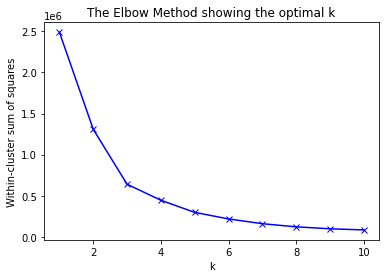

In [22]:
wcss_vec = count_wcss_scores(df, 10)
x_ticks = list(range(1, len(wcss_vec) + 1))
plt.plot(x_ticks, wcss_vec, 'bx-')
plt.xlabel('k')
plt.ylabel('Within-cluster sum of squares')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Metoda łokcia proponuje podział na 3 lub 4 klastry.

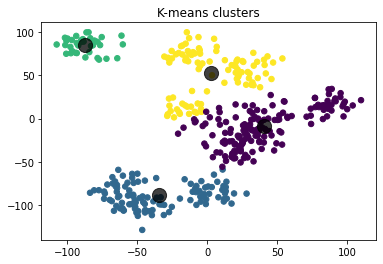

In [25]:
plot_kmeans_clusters(df, 4)

## Metoda Silhouette



In [27]:
# funkcja z labów
def count_clustering_scores(X, cluster_num, model, score_fun):
    if isinstance(cluster_num, int):
        cluster_num_iter = [cluster_num]
    else:
        cluster_num_iter = cluster_num
        
    scores = []    
    for k in cluster_num_iter:
        model_instance = model(n_clusters=k)
        labels = model_instance.fit_predict(X)
        wcss = score_fun(X, labels)
        scores.append(wcss)
    
    if isinstance(cluster_num, int):
        return scores[0]
    else:
        return scores

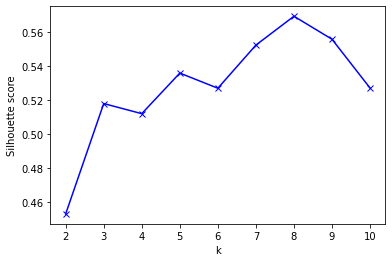

In [28]:
cluster_num_seq = range(2, 11)
silhouette_vec = count_clustering_scores(df, cluster_num_seq, KMeans, silhouette_score)
plt.plot(cluster_num_seq, silhouette_vec, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.show()


Widzimy, że ta metoda proponuje podział na więcej klastrów, optymalnie 8. Mnie osobiście też ten podział bardziej przekonuje.

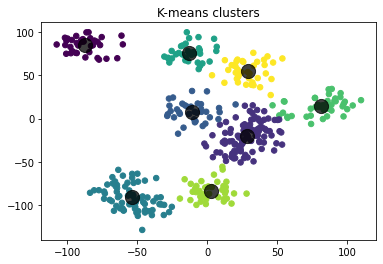

In [29]:
plot_kmeans_clusters(df, 8)

## Metoda Daviesa-Bouldina
Im bliżej zera tym lepszy wynik.

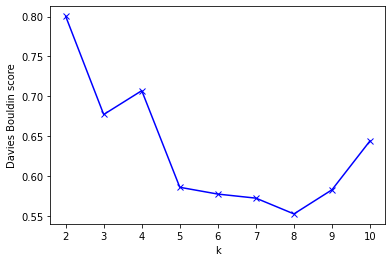

In [31]:
cluster_num_seq = range(2, 11)
silhouette_vec = count_clustering_scores(df, cluster_num_seq, KMeans, davies_bouldin_score)
plt.plot(cluster_num_seq, silhouette_vec, 'bx-')
plt.xlabel('k')
plt.ylabel('Davies Bouldin score')
plt.show()

Ponownie za najlepszą liczbę klastrów została uznana 8.

## Klasteryzacja hierarchiczna

In [46]:
def plot_agglomerative_clusters(X, n_clusters, linkage):
    clusters = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage).fit_predict(X)
    
    plt.scatter(X[:, 0], X[:, 1], c=clusters, s=30, cmap='viridis')
    plt.title(f'Agglomerative clustering with linkage={linkage}')
    plt.show()

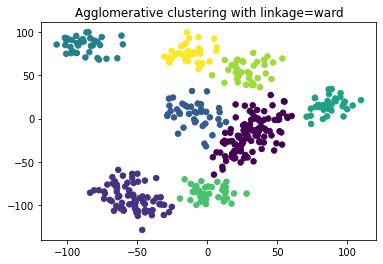

In [52]:
plot_agglomerative_clusters(df, 8, 'ward')

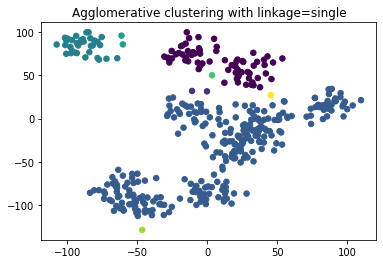

In [53]:
plot_agglomerative_clusters(df, 8, 'single')

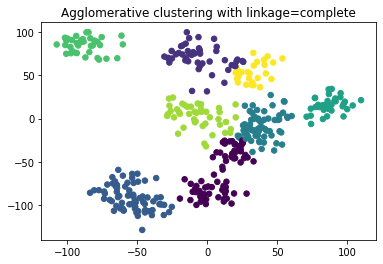

In [54]:
plot_agglomerative_clusters(df, 8, 'complete')

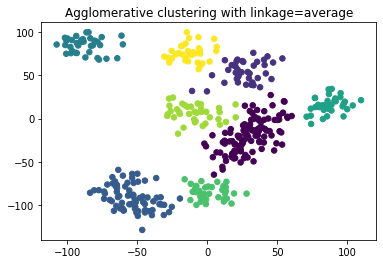

In [55]:
plot_agglomerative_clusters(df, 8, 'average')

## Wybór liczby klastrów

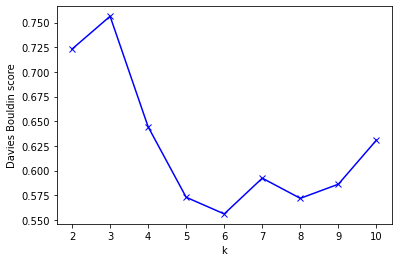

In [56]:
cluster_num_seq = range(2, 11)
davies_bouldin_vec = count_clustering_scores(df, cluster_num_seq, AgglomerativeClustering, davies_bouldin_score)
plt.plot(cluster_num_seq, davies_bouldin_vec, 'bx-')
plt.xlabel('k')
plt.ylabel('Davies Bouldin score')
plt.show()

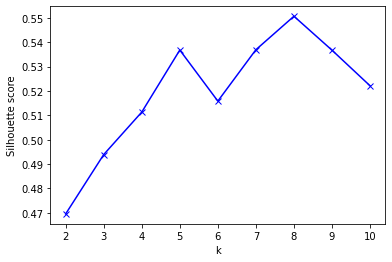

In [57]:
cluster_num_seq = range(2, 11)
silhouette_vec = count_clustering_scores(df, cluster_num_seq, AgglomerativeClustering, silhouette_score)
plt.plot(cluster_num_seq, silhouette_vec, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.show()

W zależności od metody proponowane jest 6 lub 8 klastrów. Jednak podział na 8 klastrów wypada lepiej, z racji tego, że  metryce Daviesa-Bouldina wynik dla 8 jest bardzo blisko wyniku dla 6. Z kolei w przypadku metryki Silhouette podział na 6 klastrów nie jest nawet w czołówce.